# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Encoding / Decoding

\begin{align*}
    \textsf{encode} : \{0, 1\}^\ell \to \mathcal{C} \\
    \textsf{decode} : \mathbb{C} \to \{0, 1\}^\ell
\end{align*}

* $\ell$ : length of binary sequence
* $n=2^\ell$
* $\mathcal{C}$ : $\mathcal{C} = \{\zeta^j\}_{j=0}^{n-1}, \zeta = \exp \left({\frac{-2\pi i}{n}} \right)$

$$
    \textsf{encode}(\vec{x}) = \zeta^{\textsf{int}(\vec{x})}
$$



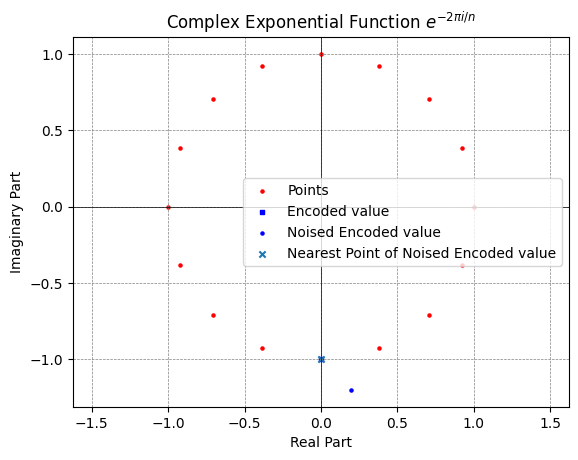

Bits : 0100 , Convert to INT :  4
Encoded value :  (-2.220446049250313e-16-1j)
Decoded value :  4.0


In [2]:
l = 4
n = 2 ** l
bits = '0100'
zeta = np.exp(-2j * np.pi / n)
C = np.array([zeta ** i for i in range(n)])
# print(int(bits, 2))
# print(C)

def encode(bits):
    return zeta ** int(bits , 2)

def decode(target):
    nearest_point = min(C, key=lambda c: np.abs(c - target))
    result = np.log(nearest_point) / np.log(zeta)
    return result.real

# Extract real and imaginary parts
real_parts = [c.real for c in C]
imag_parts = [c.imag for c in C]
# print(real_parts)
# print(imag_parts)

encoded_val = encode(bits)
noised_encoded_val = encoded_val + 0.2-0.2j
nearest_point = min(C, key=lambda c: abs(c - noised_encoded_val))
decode_val = decode(noised_encoded_val)

# Mark the points
plt.scatter(real_parts, imag_parts, color='red', s=5, label='Points')
plt.scatter(encoded_val.real, encoded_val.imag, marker='s', color='blue', s=5, label='Encoded value')
plt.scatter(noised_encoded_val.real, noised_encoded_val.imag, color='blue', s=5, label='Noised Encoded value')
plt.scatter(nearest_point.real, nearest_point.imag, marker='x', s=20, label='Nearest Point of Noised Encoded value')

# Add grid, labels, and legend
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Complex Exponential Function $e^{-2 \pi i / n}$')
plt.legend()
plt.axis('equal')
plt.show()

print("Bits :", bits, ", Convert to INT : ", int(bits, 2))
print("Encoded value : ", encoded_val)
print("Decoded value : ", decode(noised_encoded_val))

# LUT as an interpolation polynomial

$$
    \text{Interpolation polynomial} : f(u) = \sum_{i=0}^{n-1} a_i u^i
$$

$$
    [a_0, \dots, a_{n-1}] \cdot U = [d_0, \dots, d_{n-1}]
$$

$$
    U = \left[\begin{matrix}
        c_{0}^{0} & c_{1}^{0} & \cdots & c_{n-1}^{0} \\ 
        c_{0}^{1} & c_{1}^{1} & \cdots & c_{n-1}^{1} \\
        \vdots & \vdots & \ddots & \vdots \\
        c_{0}^{n-1} & c_{1}^{n-1} & \cdots & c_{n-1}^{n-1} 
    \end{matrix}\right],
    \mathcal{C} = \{c_0, \dots, c_{n-1}\}
$$

즉, $d_i = f(c_i)$ 를 의미하며 $\textsf{decode}(d_i)$ 는 LUT operation 의 결과인 $T_{\ell \to \ell}(\textsf{decode}(c_i))$ 를 나타낸다.
> 여기서 참고할 것은 $a_i \in \mathbb{C}$ 이다.

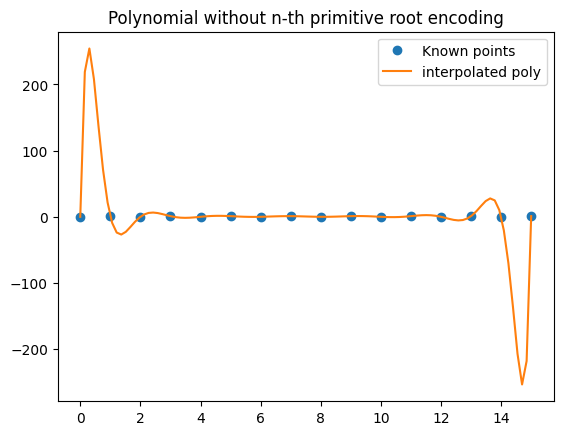

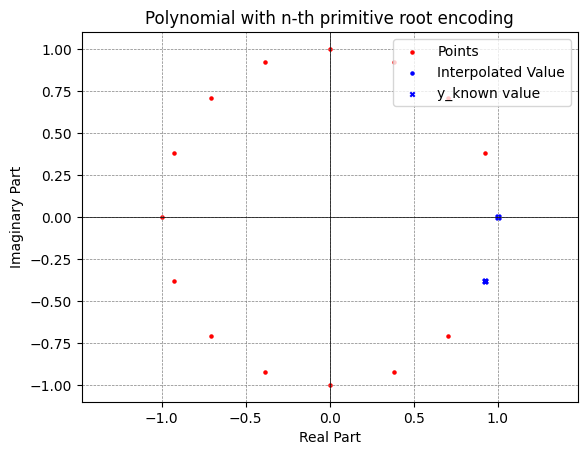

Expected value [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
After LUT [-0.  1. -0.  1. -0.  1. -0.  1. -0.  1. -0.  1. -0.  1. -0.  1.]


In [74]:
def encode_vector(vec):
    encoded_values = [zeta ** i for i in vec]
    return np.array(encoded_values)

def decode_vector(target_vector):
    # Decode each element in the vector
    decoded_values = [decode(t) for t in target_vector]
    return np.array(decoded_values)


# Known data points
x_known = np.array([i for i in range(n)])
y_known = [0 if x % 2 == 0 else 1 for x in x_known]
x_known_complex = C
y_known_complex = encode_vector(y_known)

# Plotting the results before encoding --> int
degree = n - 1
coefficients = np.polyfit(x_known, y_known, degree)
interpolated_poly = np.poly1d(coefficients)
x_vals = np.linspace(0, n-1, 100)
y_vals = interpolated_poly(x_vals)

plt.plot(x_known, y_known, 'o', label='Known points')
plt.plot(x_vals, y_vals, label='interpolated poly')
plt.title('Polynomial without n-th primitive root encoding')
plt.legend()
plt.show()

# Plotting the result after encoding --> complex number

# Fit real part with polynomial fitting (degree n-1)
degree = n - 1
coefficients = np.polyfit(x_known_complex, y_known_complex, degree)
interpolated_poly = np.poly1d(coefficients)
y_vals_interpolated = interpolated_poly(x_known_complex)

plt.scatter(real_parts, imag_parts, color='red', s=5, label='Points')
plt.scatter(y_vals_interpolated.real, y_vals_interpolated.imag, color='blue', s=5, label='Interpolated Value')
plt.scatter(y_known_complex.real, y_known_complex.imag, color='blue', marker='x', s=10, label='y_known value')
# plt.scatter(y_vals_interpolated.real, y_vals_interpolated.imag, color='red', s=5, label='Points')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Polynomial with n-th primitive root encoding')
plt.axis('equal')
plt.legend()
plt.show()

#----------------------------------------------------------------------------------------------------------------------------------

U = np.array([C ** i for i in range(n-1, -1, -1)])
d = coefficients @ U

print("Expected value",y_known)
print("After LUT", decode_vector(d))


# Extension to an $\alpha \ell$-to-$\beta \ell$ LUT

다음과 같은 상황을 고려하자
* $T_{\alpha\ell \to \beta\ell} : \{0,1\}^{\alpha\ell} \to \{0,1\}^{\beta\ell} \text{ for } \alpha,\beta \in \N$
* $\left\{ T_{\alpha\ell \to \ell}^{(j)} : \{0,1\}^{\alpha\ell} \to \{0,1\}^\ell \right\}_{j \in [0,\beta)} \text{ s.t. } T_{\alpha\ell \to \ell}^{(j)}(\vec{x}) = T_{\alpha\ell \to \beta\ell}(\vec{x}_{[j\ell, (j+1)\ell -1]})$

여기서 부터 다음과 같은 multivariate polynomial 이 사용되기 시작한다.
$$ f_j(u_0, \dots, u_{\alpha-1}) = v_j $$